In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# drive_path = '/data/allen-brain-observatory/visual-coding-2p'
# manifest_file = os.path.join(drive_path,'manifest.json')

#temp
manifest_file=r'/Users/saskiad/brain_observatory/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [3]:
cell_id = 541513979

In [4]:
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['drifting_gratings'])
session_id = exps[0]['id']
data_set = boc.get_ophys_experiment_data(session_id)

In [5]:
timestamps, dff = data_set.get_dff_traces(cell_specimen_ids=[cell_id])
dff_trace = dff[0,:]

Text(0,0.5,u'DFF')

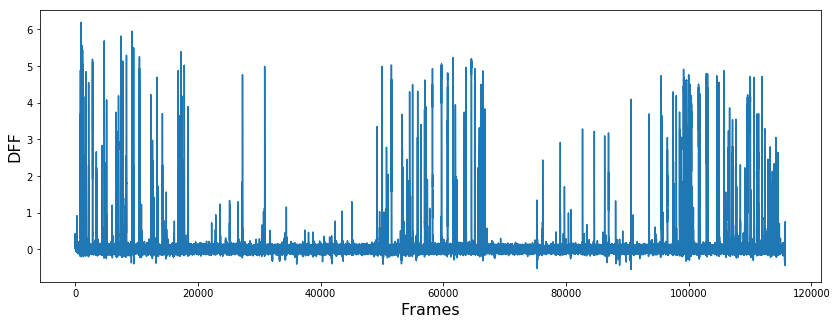

In [6]:
plt.figure(figsize=(14,5))
plt.plot(dff_trace)
plt.xlabel("Frames", fontsize=16)
plt.ylabel("DFF", fontsize=16)

In [7]:
dxcm, ts = data_set.get_running_speed()

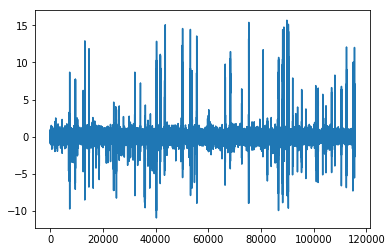

In [8]:
plt.plot(dxcm)

In [12]:
print session_id

540684467


In [9]:
data_set.get_stimulus_epoch_table()

,stimulus,start,end
0,drifting_gratings,736,18810
1,natural_movie_three,19746,37850
2,natural_movie_one,38756,47807
3,drifting_gratings,48712,66786
4,spontaneous,66936,75868
5,natural_movie_three,75869,93972
6,drifting_gratings,94878,115485


In [10]:
ts, dff = data_set.get_dff_traces()

In [11]:
dff.shape

(290, 115741)

(38756, 47807)

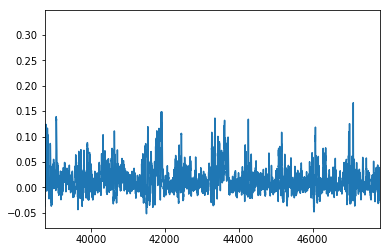

In [12]:
plt.plot(dff.mean(axis=0))
plt.xlim(38756,47807)

In [13]:
import scipy.stats as st

In [14]:
st.linregress(dff.mean(axis=0)[np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

LinregressResult(slope=4.4614365495562209, intercept=0.0040501809582929524, rvalue=0.09320756531498843, pvalue=4.6570350864362193e-221, stderr=0.14026421781386797)

In [15]:
st.linregress(dff_trace[np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

LinregressResult(slope=-0.0096476430520787988, intercept=0.054006118731897278, rvalue=-0.0058006448379716189, pvalue=0.048737225947971911, stderr=0.0048950341265734196)

In [16]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings
dg = DriftingGratings(data_set)

In [17]:
msr = dg.mean_sweep_response

In [18]:
msr.shape

(628, 291)

In [22]:
response_table = msr.values[:,:-1]

In [23]:
response_table.shape

(628, 290)

In [24]:
running_speed = msr.values[:,-1]

In [25]:
running_speed.shape

(628,)

In [26]:
from scipy.linalg import lstsq

In [27]:
Nstim, N = response_table.shape
residuals = np.zeros((Nstim, N))
running_speed -= running_speed.mean()

In [147]:
for n in range(N):
    response = response_table[:,n]
    response -= response.mean()
    residuals[:,n] = response - (lstsq(running_speed[:,None], response[:,None])[0]*running_speed)

In [69]:
response.shape

(628,)

In [70]:
running_speed.shape

(628,)

In [137]:
lstsq(running_speed[:,None], response[:,None])[0]

array([[ 0.11581365]])

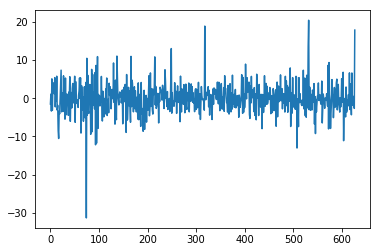

In [145]:
plt.plot(response[:,None] - (lstsq(running_speed[:,None], response[:,None])[0]*running_speed[:, None]))

In [113]:
run_pred = np.linspace(-1,4,101)
resp_pred = 0.96*run_pred

In [148]:
residuals.shape

(628, 290)

ValueError: operands could not be broadcast together with shapes (290,) (101,) 

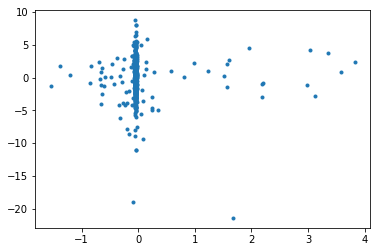

In [132]:
i=5
plt.plot(running_speed, response_table[:,i], '.')
resp_pred = residuals[i]*run_pred                                       
plt.plot(run_pred, resp_pred)

In [124]:
output[0][0]

-0.0011948174551525406

In [133]:
residuals.shape

(628, 290)

In [134]:
lstsq(running_speed[:,None], response[:,None])[0]

array([[ 0.11581365]])

In [105]:
output = lstsq(response_table, running_speed)

In [109]:
output[0].shape

(290,)

In [131]:
for n in range(N):
    response = response_table[:, n]
    response -= response.mean()
    residuals[:, n] = response - lstsq(running_speed[:,None], response[:,None])[0]

In [ ]:
response, running_speed, _ = get_tables_exp(master_stim_table, dff, dxcm, pupil_size=None, width=run_window)

In [48]:
master_stim_table = data_set.get_stimulus_table('master')

In [50]:
N, T = dff.shape

In [53]:
start = master_stim_table['start'][0]

In [52]:
T

115741

In [54]:
T -= start

In [55]:
T

115005

In [57]:
Nstim = np.floor(np.float(T) / np.float(60)).astype('int')

In [58]:
response_array = np.zeros((Nstim, N))
running_array = np.zeros((Nstim))

In [59]:
temp = np.ma.masked_array(dxcm, mask=np.isnan(dxcm)).reshape(-1, 1)

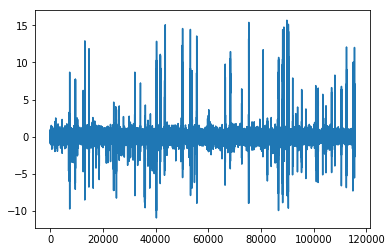

In [61]:
plt.plot(dxcm)

In [66]:
temp[20000]

masked_array(data = [-0.265643835067749],
             mask = [False],
       fill_value = 1e+20)

In [63]:
temp.shape

(115741, 1)

In [64]:
dxcm.shape

(115741,)

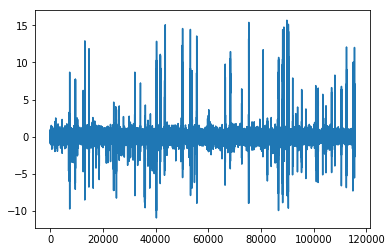

In [65]:
plt.plot(temp)

In [68]:
width = 60
for i in range(Nstim):
    response_array[i] = np.mean(dff[:, start+(i*width):start+(i+1)*width], axis=1)
    running_array[i] = np.ma.mean(temp[start+(i*width):start+(i+1)*width])

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Warning: converting a masked element to nan.


In [84]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [ ]:
cell_specimens.reli

In [79]:
nm1a_list = np.load(r'/Users/saskiad/Documents/Data/CAM/nm1a_list.npy')

In [80]:
nm3_list = np.load(r'/Users/saskiad/Documents/Data/CAM/nm3_list.npy')

In [93]:
cell_specimens[cell_specimens.cell_specimen_id.isin(nm1a_list)].reliability_nm1_a.median()

0.139384473570519

In [94]:
cell_specimens[~(cell_specimens.cell_specimen_id.isin(nm1a_list))].reliability_nm1_a.median()

0.02100571049603685

(-0.05, 0.3)

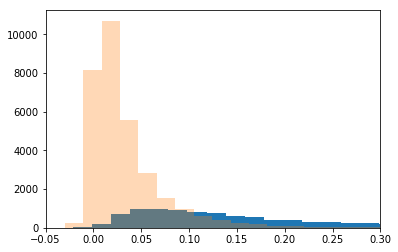

In [96]:
plt.hist(cell_specimens[cell_specimens.cell_specimen_id.isin(nm1a_list)].reliability_nm1_a, bins=50);
plt.hist(cell_specimens[~(cell_specimens.cell_specimen_id.isin(nm1a_list))].reliability_nm1_a.dropna(), bins=50, alpha=0.3);
plt.xlim(-0.05, 0.3)

(-0.05, 0.3)

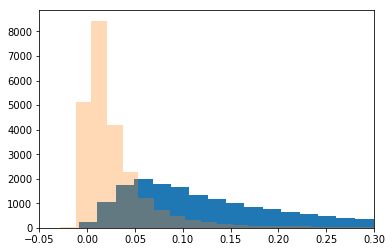

In [97]:
plt.hist(cell_specimens[cell_specimens.cell_specimen_id.isin(nm3_list)].reliability_nm3, bins=50);
plt.hist(cell_specimens[~(cell_specimens.cell_specimen_id.isin(nm3_list))].reliability_nm3.dropna(), bins=50, alpha=0.3);
plt.xlim(-0.05, 0.3)